<br><br><font color="gray">INTEG 440 / 640<br>MODULE 10 of *Doing Computational Social Science*</font>


# <font color="green" size=40>DISCOVERING LATENT THEMES <br>IN UNSTRUCTURED TEXT DATASETS</font>

<br>

Dr. [John McLevey](http://www.johnmclevey.com)    
Department of Knowledge Integration   
Department of Sociology & Legal Studies     
University of Waterloo         

<hr>

* INTEG 440 (Undergraduate): This module is worth <font color='#437AB2'>**8%**</font> of your final grade. The questions in this module add up to 10 points. 
* INTEG 640 (Graduate): This module is worth <font color='#437AB2'>**5%**</font> of your final grade. The questions in this module add up to 10 points. 

<hr>

# Table of Contents 

* [Overview](#o)
* [Learning Outcomes](#lo) 
* [Prerequisite Knowledge](#pk) 
* [Assigned Readings](#ar) 
* [Question Links](#ql)
* [Packages Used in this Module](#packs)
* [Data Used in this Module](#data)
* **[Identifying Texts with Similar Content](#km)**
* **[Discovering Latent Themes with Topic Models](#tm)**
* **[Semantic Network Analysis](#semnets)**
* [References](#refs)

<hr>   

# Overview <a id='o'></a>

Discovering latent themes in large collections of unstructured text data is one of the most common tasks in computational text analysis. This module introduces and compares three of the most widely used methods: 

1. document similarity and cluster analysis
2. topic modelling
3. socio-semantic network analysis 

<hr>

# Learning Outcomes  <a id='lo'></a>

Upon successful completion of this module, you will be able to: 

1. Compare the pros and cons of (1) document similarity and cluster analysis, (2) topic modelling, and (3) socio-semantic network analysis
2. Conduct and interpret a document similarity and cluster analysis
3. Conduct and interpret an Latent Dirichlet Allocation (LDA) and Non-Negative Matrix Factorization (NMF) topic model analysis 
4. Conduct and interpret a socio-semantic network analysis 
5. Explain why the results of an unsupervised learning analysis should never be interpreted as some kind of 'ground truth' 

<hr>

# Prerequisite Knowledge  <a id='pk'></a>

This module assumes comfort with the fundamentals of Python, and basic comfort with the fundamentals of natural language processing and network analysis. 

<hr>

# Assigned Readings  <a id='ar'></a>

This module assumes you have completed the assigned readings, which are listed immediately below. The readings provide a detailed explanation of the core concepts covered in this module. 

* <font color="green">Chapter 17 "Discovering Topics with Unsupervised Learning" from *Doing Computational Social Science*.</font> 
* <font color="green">Chapter 18 "Socio-Semantic Networks" from *Doing Computational Social Science*.</font> 

As always, I recommend that you (1) complete the assigned readings, (2) attempt to complete this module without consulting the readings, making notes to indicate where you are uncertain, (3) go back to the readings to fill in the gaps in your knowledge, and finally (4) attempt to complete the parts of this module that you were unable to complete the first time around.

This module notebook includes highly condensed overviews of *some* of the key material from the assigned reading. This is intended as a *supplement* to the assigned reading, *not as a replacement for it*. These high-level summaries do not contain enough information for you to successfully complete the exercises that are part of this module, and they do not cover every relevant topic.

<hr>

# Question Links <a id='ql'></a>

Make sure you have answered all of the following questions before submitting this notebook on LEARN. 

1. [Question 1](#yt1)
2. [Question 2](#yt2)
3. [Question 3](#yt3)
4. [Question 4](#yt4)
5. [Question 5](#yt5)
6. [Question 6](#yt6)
7. [Question 7](#yt7)
8. [Question 8](#yt8)
9. [Question 9](#yt9)
10. [Question 10](#yt10)

<hr>

# Packages Used in this Module <a id='packs'></a>

The cell below imports the packages that are necessary to complete this module. If there are any additional packages you wish to import, you may add them to this import cell. 

In [1]:
!pip install yellowbrick
!pip install pyLDAvis
!pip install community
!pip install python_louvain
import spacy 
nlp = spacy.load('en_core_web_sm')

import sklearn
import sklearn.feature_extraction.text
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF, LatentDirichletAllocation
from yellowbrick.cluster import SilhouetteVisualizer

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')
# make inline plots vector graphics instead of raster. 
%config InlineBackend.figure_format = 'svg'

import numpy as np
import pandas as pd

import nate

import networkx as nx 
import community

  Using cached yellowbrick-1.1-py3-none-any.whl (263 kB)
Processing /home/jupyter/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414/pyLDAvis-2.1.2-py2.py3-none-any.whl
Processing /home/jupyter/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e/future-0.18.2-cp37-none-any.whl
Processing /home/jupyter/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb/funcy-1.14-py2.py3-none-any.whl
Processing /home/jupyter/.cache/pip/wheels/0d/7e/f9/089b3c72d33c16b8d3edb17f64291511e5eea08b80e419faa7/community-1.0.0b1-cp37-none-any.whl
  Using cached Flask-1.1.1-py2.py3-none-any.whl (94 kB)
  Using cached itsdangerous-1.1.0-py2.py3-none-any.whl (16 kB)
Processing /home/jupyter/.cache/pip/wheels/f9/74/a9/14f051b00dddd46d71529db15507796da13a43ee2c0bc39def/python_louvain-0.13-cp37-none-any.whl


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# Data Used in this Module <a id='data'></a>

Once again, we will use a sample of Risdale's (2016) fake and real news dataset. 

In [2]:
df = pd.read_csv('data/fake_news.csv')
fake_sample = df[df['label'] == 'FAKE'].sample(200)
real_sample = df[df['label'] == 'REAL'].sample(200)
sampled_news = pd.concat([fake_sample, real_sample])
sampled_news.head()

,Unnamed: 0,title,text,label
5125,6185,New Report Finds Voters Have No Idea How Outra...,New Report Finds Voters Have No Idea How Outra...,FAKE
4006,9624,"WSJ Report Not About Black Rapists At Baylor, ...",X Dear Reader! VDARE.com isn’t just a website....,FAKE
4450,6894,"Voters in Arkansas, North Dakota Legalize Medi...",By Mike Maharrey Voters in North Dakota and Ar...,FAKE
4429,9326,"Hope, Change, Lies and Greatness",One of the themes of this election cycle in Am...,FAKE
3935,10156,Russia to test new anti-tank guided missiles i...,"RBTH Daily , syria , aviation , missiles Ka-52...",FAKE


In [3]:
text = sampled_news['text']

# Pre-Processing and Vectorization 

We will use a function to prepare our text for analysis by reducing each text to a list of the lemmatized versions of non-stop word nouns. This function is slightly different than the one we developed in the previous module. We will then vectorize our text using the `TfidfVectorizer` covered in the previous module. 

In [4]:
processed = [nlp(t) for t in text]

In [5]:
def prepare_text(list_of_processed_texts):
    """
    Quickly grab the lemmas of non-stopword nouns and adjectives. 
    """
    analysis_text = []
    
    types = ['NOUN', 'ADJ'] 
    for doc in list_of_processed_texts: 
        reduced = [token.lemma_ for token in doc if token.is_stop is False and token.pos_ in types]        
        analysis_text.append(" ".join(reduced))
    return analysis_text

In [6]:
analysis_text = prepare_text(processed)
len(analysis_text)

400

In [7]:
vect = TfidfVectorizer(max_df = .1, min_df = 3, stop_words = 'english', lowercase = True)

matrix = vect.fit_transform(analysis_text)
print(matrix.shape)

(400, 3124)


We can take a quick look at the words with the highest TF-IDF scores. 

In [8]:
term_tfidf = pd.DataFrame(list(zip(vect.vocabulary_.keys(), matrix.data)), \
                          columns = ['Word','TF-IDF']).sort_values('TF-IDF', ascending = False)

term_tfidf[:25]

,Word,TF-IDF
2073,personality,0.942381
1901,nearby,0.798981
2987,guru,0.782348
1514,industry,0.731122
1469,mankind,0.625036
997,tyranny,0.622485
1254,judge,0.604053
3110,ethanol,0.574853
3121,qualified,0.568321
1884,farm,0.566154


# Identifying Texts with Similar Content

## Clustering Similair Texts with $k$-means Clustering <a id='km'></a>

So how do we cluster our document collection into sets of documents with similar content? One of the most simple and common clustering methods is $k$-means, which is an unsupervised method of partitioning our dataset into clusters where the documents in each cluster are more similar to one another than they are to other documents in the corpus. One catch is that we need to specify in advance the number of clusters we want the $k$-means algorithm to retrieve. $k$ in $k$-means is the number of clusters we are looking for. 

If we (arbitrarily) select 35 as the value for $k$ in a $k$-means cluster analysis, then the algorithm begins by picking 35 random starting points for cluster "centroids." It then assigns each observation to its closest centroid, and *moves* the centroids to the mean of the assigned points. Its goal is to minimize the squared distance between it and each point. This process of moving around in space to minimize the squared distances is repeated iteratively until the clusters that observations get assigned to no longer change. It is possible to set limits on the number of iterations performed to shorten the compute time, but the results improve with each iteration, so in most cases it is better not to limit the number of iterations.

In [9]:
num_clusters = 35
km = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
km.fit(matrix)

clusters = km.labels_.tolist()

Now that we have clustered our data into 35 clusters, let's take a look at the top words per cluster to help us better understand the content of the documents in each cluster.

In [10]:
terms = vect.get_feature_names()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

top = []
for i in range(num_clusters):
    cluster_words = [terms[ind] for ind in order_centroids[i, :10]]
    top.append(' '.join(cluster_words))

for i in range(num_clusters):
    print('Top words for Cluster {}:'.format(str(i)))
    print(top[i])
    print('\n\n')

Top words for Cluster 0:
russian syrian terrorist https terror egyptian situation com map org



Top words for Cluster 1:
address mail content appointment account remarkable classified clearance confidential brave



Top words for Cluster 2:
laptop server warrant brand investigator agent aide classified crazy replacement



Top words for Cluster 3:
letter disease fat risk vaccine duck prison wrong terrorism conspiracy



Top words for Cluster 4:
judge polling reform tariff attorney license marriage school math cuban



Top words for Cluster 5:
nuclear missile weapon fresh warhead korean sanction test ship range



Top words for Cluster 6:
immigration border immigrant illegal wall deportation mexican funding latin shutdown



Top words for Cluster 7:
stage agent guy crowd undercover purpose conversation witness rhetoric suspect



Top words for Cluster 8:
proposal referendum insurance exchange single subsidy option argument suggestion million



Top words for Cluster 9:
ballot conventio

### <font color="green">YOUR TURN! (Question 1)</font><a id='yt1'></a>

Question is Worth: <font color="green">1.5 pointa</font>

Recall from the readings that, even if your clusters look good when you inspect them this way, you may not have selected a good value for $k$. In the cell below, explain why this could be the case. Hint: *it has to do with centroids*.

One probable way to tackle this is through the use of the elbow method for which you can iteratively go through each K-value and measure the accuracy for each value of K gone through. In a topic association model, the number of K can result in either too general or too specific set of clusters that can be misaligned from the research you intend on doing or the values you seem to expect. Alongside, since K-means by nature will be initialized randomly and can possibly result in a set of new clusters each time dependent on the criteria of distance. To mitigate this case, we should look at a multitude of initializations and decide for the set of centroids which generate the lowest possible square distance among the data points within the cluster. This is dependent on selecting a randomization method that does not reproduce the same results and works in benefit of analysing different venues of analysis. Among such, cluster selection is dependent on the distance measure employed which can yield in different types of clusters depended on the nature of the distance measuure (Euclidean, etc.). 

## How Many Clusters Should We Look For? The Elbow and Silhouette Methods

At first glance, most of these clusters look reasonably coherent. But is 35 really the best number of clusters? `sklearn` returned 35 clusters because we *asked* it to find 35 clusters. That doesn't mean 35 is the best number. It probably isn't, as I selected it arbitrarily.

Although some answers are better than others, there is no truly "correct" answer to the question "How many clusters are there?" 

So, how many clusters should we be looking for in our data? Good question! The assigned reading compares two methods: the **elbow method** and the **silhouette method**. 

### <font color="green">YOUR TURN! (Question 2)</font><a id='yt2'></a>

Question is Worth: <font color="green">1.5 points</font>

Use the cell below to try and explain what these two methods do, what is useful about each, and what their limitations are. 

### Silhouette Method
For each observation assigned to a cluster, the method assigns a score to each datapoint indicative of it's correctful association to the cluster in relation to distance among other cluster. -1 implies an incorrect association while 0 is neither or and +1 is a correctful association to the cluster of interest. The cumulative average score of observations tell us the overall performance of K-means with the clusters we have. However, this method does not highlight which number of K can be well-suited for us overall. We still have to tweak the results a little. To do so, this requires looking at Silhouette scores across a range of K-values which can be computationally expensive depending on the size of the dataset. This does give a more granular perspective for each k-model and can show us the quality of the clustering in general by means of analysis across the distribution. 

### Elbow Method 
With Elbow method, you can specify the range of K to do cluster analysis for and inspecting the performance in SSE as a graph across the number of K values chosen. In the elbow method, you kind of expect to see an elbow like formulation where the "joint" of the arm represents the most optimal number of K for the clustering. A limitation in this method would be not being able to see a joint as the starting point for diminishing return which causes complexity in choosing the optimal number. This should be used in conjunction with silhouette method to do the most appropriate form of analysis or specifying the appropriate range for K-means analysis. 

Let's use the elbow method to help select a good value for $k$. The code block below -- **which takes a *very* long time to run**, so you may choose not to run the cell at all -- will compare the quality of models with different values for $k$. 

In [11]:
Sum_of_squared_distances = []
K = range(15,150)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(matrix)
    Sum_of_squared_distances.append(km.inertia_)

Text(0.5, 1.0, 'The Elbow Method for Selecting the Best Value for k')

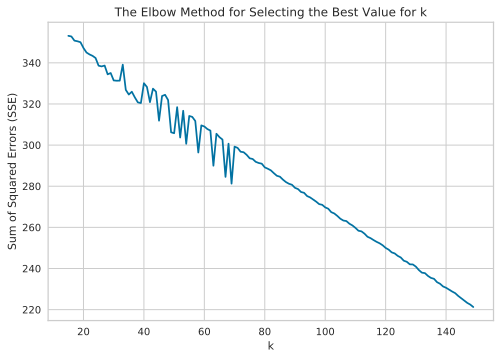

In [12]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('The Elbow Method for Selecting the Best Value for k')
# plt.close()

### <font color="green">YOUR TURN! (Question 3)</font><a id='yt3'></a>

Question is Worth: <font color="green">1 point</font>

In the text cell below explain how to read the plot above. What does it tell you? What conclusions can you draw, and why?

This plot demonstrates the SSE of each K-means model relative to an increasing value within the range of K. Here, it shows us what is the aggregate squared distance between points and their relative clusters. Within here, our criteria is to look for a small k-value with a relatively low SSE value. In a ideal setting, we're looking for the line graph to be similar to an elbow where the joint is the most optimal k-value to choose. Choosing any K-value greater would be getting diminishing returns. Based on the plot above, we really don't see the type of formation we'd like to see in being able to see the optimal k-value which indicates that we can't really use the plot for our intended purposes. In this case, it means we should switch gears and look at doing silhouette scores to assess our cluster analysis and make better sense of whether to increase or decrease the K-value or consider looking at higher K-values for analysis since we see a declining SSE.

The elbow method above likely raised some doubts in your mind about the quality of our 35 cluster solution. Let's use another method -- a Silhouette analysis -- to take a closer look at the data. In a very general sense, a Silhouette analysis is focused on the density within and separation between clusters. 

Let's use the `SilhouetteVisualizer` from the [`yellowbrick` project](https://www.scikit-yb.org/en/latest/index.html) to produce a silhouette of our $k$-means cluster analysis. All we need to provide is the $k$-means object itself and the original matrix we provided. 

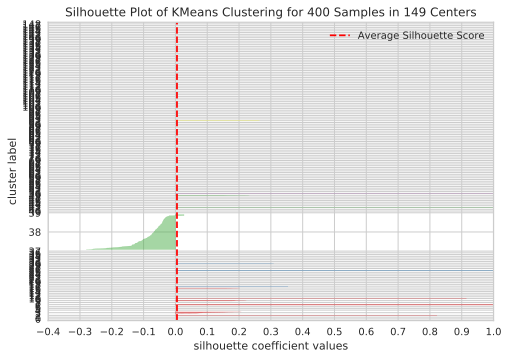

In [32]:
visualizer = SilhouetteVisualizer(km)
visualizer.fit(matrix) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

### <font color="green">YOUR TURN! (Question 4)</font><a id='yt4'></a>

Question is Worth: <font color="green">1 point</font>

In the text cell below, provide a detailed interpretation of the Silhouette plot above. First, what can we learn about our $k$ = 35 $k$-means cluster analysis? Be sure to make explicit reference to the interpretation of high and low silhouette values within clusters. Second, would you increase or decrease the value of $k$ in this analysis? Why? Be sure to justify your answer with reference to the plot above. 

The Silhouette plot above highlights a distinctive Silhouette score for each cluster label within the 35-means cluster model. There seems to be an abundance of cluster labels with silhouette scores below 0 which indicates there are relatively incorrect labelled observations which could potentially be improved by using a different k value. Theres certain spikes of positive scores indicating correct assignment but not enough. Since there seems to be a lot of low scores and mostly negative, the correct thing would be to increase the cluster count for better assignment which means increasing the number of K. We ant to ideally see more larger positive values and less negative values for silhouette scores, so it makes sense to increase the cluster count to have more opportunity for correctful association among the previously negative (incorrect) scores. To add to above, the average silhouette score is also below 0. 

P.S:
When the Silhouette plot was run initially, there were distinct negative scores in a larger abundance than the very few large positive scores. In it's most recent run, there seems to be a specific clump of values in which the silhouette score is negative. 

## Visualizing a Cluster Analysis

Our next step is to visualize the relationship between our documents and clusters using a dimensionality reduction technique called Principal Components Analysis (PCA). 

### Principal Components Analysis (PCA) 

As you know from the assigned reading, the basic idea behind PCA and other dimensionality reduction techniques is that many of the features in our feature matrix are correlated with one, and we can simplify things by creating a new set of dimensions (or variables, really) that are made up of linear combinations of features that are correlated with one another. The new dimensions are uncorrelated with one another. 

The benefit of this approach is that we are left with a smaller number of uncorrelated components to work with. Each of the principle components is uncorrelated with the other components. Because they are statistically independent of one another, we can use them in a wide-variety of regression models without violating assumptions of independence. However, one downside of this approach is that it is not always clear what the dimensions represent (at least relative to the simple task of interpreting the meaning of a variable for "number of times the word 'cat' shows up in a document."). Given that a central role of modelling in the social sciences is to explain (as opposed to the focus on prediction and predictive accuracy in computer science and data science), it is not always very useful to estimate a model where the covariates are not easily connected back to operationalized variables. 

In this case, our goal is to create a two-dimensional map of the relationships between the documents and clusters we have identified. We are going to do this by conducting a PCA and selecting the first two dimensions for plotting. *These two dimensions will explain more than any other individual dimensions, but they will still only account for a small amount of variance in our dataset,* so we should be cautious in how we interpret the results. 

Remember, this is a tool to amplify our cognitive ability to cluster and compare cases. This is a very **interpretive process**, and it's important to remember that. If you forget, change some of the parameters in any of the analyses we have conducted so far. You will see how it changes what we learn from our data. 

In [14]:
pca = PCA(random_state = 23).fit(matrix.toarray())

We now have a number of new synthetic "components" that account for the variation in our data. The figure below -- a "scree plot" -- plots the cumulative variance accounted for by each additional component. 

Text(0, 0.5, 'Cumulative Explained Variance')

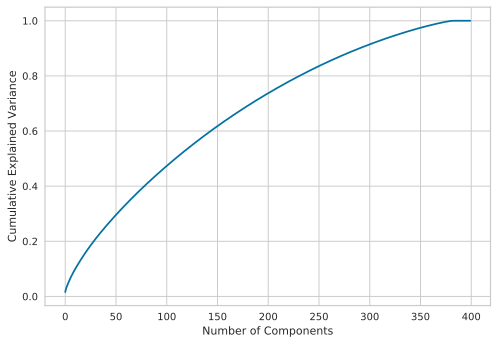

In [33]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

### <font color="green">YOUR TURN! (Question 5)</font><a id='yt5'></a>

Question is Worth: <font color="green">.5 points</font>

In the cell below, interpret the scree plot above. What do scree plots in general, and this plot specifically, tell you? Approximately how much of the cumulative variance is explained by the first 250 components? What are some limitations of this approach? 

Scree plots help us to show the relationship between variance and an iteration of considering principal components at a whole. With this, one can see how much variance of the dataset can be captured through a reduced number of features which helps for cluster analysis and preventing overfitting. Here it shows that we can account for over 60% of the cumulative variance just with 200 principal components for our premise of analysis. With 250, we're looking at a little over 80% of the total variance among the dataset we have. With such plots, you should consider that the initial first or two components represent very little variance among the observations and such should be accounted for when looking at other maps of relations since they can be misleading. This might mean considering to make changes to the vectorizer and its relevant parameters to find a plot that explains the dataset better. 

As you now doubt noticed, the first two dimensions account for *very little* of the cumulative variance in this dataset. If this were a real data analysis, you would want to spend more time working with this dataset, including modifying parameters in the vectorizer. This process -- "feature engineering" -- is an important one, and is discussed in the assigned reading. 

For now, we still want to learn the process of using these first two principal components to map the relationship between documents.

For our plot, let's grab the first two principal components and assign them to a variable called `dims`. From there, we can pull the $x$ and $y$ coordinates from the object we just created and turn it into a `Pandas` dataframe. We will also add columns for the cluster ID from the $k$-means cluster analysis earlier in this lesson and the abstracts for the individual documents. 

In [16]:
dims = PCA(n_components = 2).fit_transform(matrix.toarray())

full = pd.DataFrame()
full['Text'] = text
full['Cluster'] = ['Cluster {}'.format(str(x)) for x in km.labels_]
full['pca_x'] = list(dims[:,0])
full['pca_y'] = list(dims[:,1])

In [29]:
full.head(10)

,Text,Cluster,pca_x,pca_y
5125,New Report Finds Voters Have No Idea How Outra...,Cluster 38,-0.031199,-0.016135
4006,X Dear Reader! VDARE.com isn’t just a website....,Cluster 50,-0.044131,-0.024881
4450,By Mike Maharrey Voters in North Dakota and Ar...,Cluster 38,-0.028742,-0.011770
4429,One of the themes of this election cycle in Am...,Cluster 78,-0.028343,-0.003103
3935,"RBTH Daily , syria , aviation , missiles Ka-52...",Cluster 38,-0.071267,-0.025161
220,This time it's true no pantsTweetwave More Of ...,Cluster 38,-0.042138,0.054820
1144,How the Oligarchy Has Prepared the Groundwork ...,Cluster 38,-0.061922,-0.068534
5047,"Posted on October 30, 2016 by Tim Brown \nAmon...",Cluster 67,-0.024061,-0.031407
3128,The Liberal Conservative Examines The Bill Of ...,Cluster 39,-0.049025,-0.028822
3779,BREAKING: DOJ FINALLY Secures Warrant To Inspe...,Cluster 38,-0.057726,-0.053175


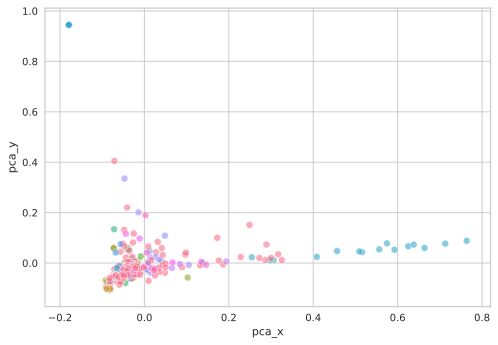

In [30]:
sns.scatterplot(full['pca_x'], full['pca_y'], hue = full['Cluster'], legend = False, alpha = .6)

Obviously, the value of this visualization is limited. First, there is little evidence that our $k$ = 35 solution is a good one, which means the PCA is also likely to be less than ideal. Second, this plot is based on two dimensions of a PCA that explain very little of the variance. Third, differentiating between clusters with colour is challenging because there are 35 clusters in our solution. The difference in colour are subtle, making interpretation rather challenging. 

### <font color="green">YOUR TURN! (Question 6)</font><a id='yt6'></a>

Question is Worth: <font color="green">1 point</font>

In the cell below, tell me what you would do to improve this analysis, including feature engineering at the vectorizer phase, selecting $k$ at the cluster analysis phase, and finally the PCA and plotting phase. 


### Feature Engineering 
At the vectorizer phase, we can play around with parameters to consider the window of analysis within our corpus. Maybe we can adjust `min_df` and `max_df` parameters to consider a larger or smaller corpus and evaluate results processed through further methods (K-means, PCA, etc.). We can potentially use a predefined vocabulary. Maybe we can remove min-df and max-df parameters altogether if we plan on looking at a TF-IDF approach in vectorization. 

### Selecting for K
In relation to what's been alluded to above for selecting K, Silhouettte Score and the Elbow Method are good methods of inspection to analyze model performance. Based on what we've seen above, it makes sense to increase the value of K as per Silhoette visualization. The elbow method doesn't really help us to find an ideal K so we must look to increasing our K-value and tweak the Silhouette visualization in order to proceed in our analysis. If the elbow method was a bit smoother, we'd do comparative analysis between each K-value and the associated average mean silhouette score. 

### PCA
Based on scree plots, we can have an informed decision on reducing the feature dimensionality in our analysis down to approximately 250 features which account for more than 80% of the cumulative variation within the corpus. The plotting between 2 dimensions should be taken with precaution since the scree plot informs us that the first two principal components do not account for much in terms of cumulative variance. A better approach would be to consider t-sne for visualizing the higher-dimensions and looking at pairwise similarities between observations given there's a fair number of iterations to go through. 

# Discovering Latent Themes with Topic Models <a id='tm'></a>

One limitation with the work we have done so far is that it assumes documents are primarily about one topic. In other words, when we cluster documents with $k$-means or assign them to communities in networks, each document gets a single membership. Now we are going to cover topic models, which do not make that assumption. Instead, topic models assume that documents are mixtures of many different topics, which are themselves mixtures of different words. Like $k$-means clustering, topic models are unsupervised models because they are attempting to discover topics that we don't know about in advance. 

When we topic model a document collection, we make the assumption that each document is composed of a mixture of topics in different proportions (including 0%!), and each topic is made of words that have a different probability of appearing in the topic. The computer does not know what the topics are, so we have to use our human abilities to interpret and label topics based on a combination of reading lists of words that have the highest probability of appearing in a topic, and close readings of a subset of the original documents. The image below -- taken from David Blei's 2012 article "Probabilistic Topic Models," published in *Communications of the ACM* -- helps clarify the underlying idea. 

![](img/lda.png)

### <font color="green">YOUR TURN! (Question 7)</font><a id='yt7'></a>

Question is Worth: <font color="green">.5 points</font>

Below, we will develop two topic models: an LDA model and an NMF model. In the cell below, describe and compare these two types of topic models. *In general*, how do they work? How are the similair? How are they different? 

### LDA Model 
Similar to K-means clustering, LDA models need to have a specification of the number of topics but each document or word will not have a singulaar membership assigned to it. LDA uses a mixture of topic-modelling and probablistic methodologies to determine the association of a composite (document) to a topic in relation to the probability of words. In topic models, we consider documents to be a mixture of numerous topics and documents contain words that can be probablistically assigned to a pertaining topic. 

### NMF Model
Nonnegative Matrix Factorization is the process of considering and restricting matrics to be nonnegative which can include weights and components to discover more meaningful observations. Given an original matrix, there can be two such matrices found that can derive meaning towards multiplying back to approximating the original. In the case of topic-modelling, NMF can be used to approximate a DTM by considering a topic cluster matrix in multiplication with a coeff matrix that represents weight of topics within each document. 

Both of these models are similar in their output of returning the documents that pertain to a specific topic along with the words that belong to a topic. Both utilize the DTM to create models but apply different perspectives (LDA uses probabilistic measures while NMF uses linear algebra)

### Latent Dirchlet Allocation (LDA) Models

In [22]:
lda = LatentDirichletAllocation(n_components=35, max_iter=5, learning_method='online', learning_offset=50., random_state=23)
lda.fit(matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=35, n_jobs=None,
                          perp_tol=0.1, random_state=23, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [23]:
tf_feature_names = vect.get_feature_names()

We will use a function written by the sklearn developers in [Topic extraction with Non-negative Matrix Factorization and Latent Dirichlet Allocation](https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py) to print the top 20 words associated with each topic. 

In [24]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
        print('\n')
        
print_top_words(lda, tf_feature_names, 20)

Topic #0: gift neighbor permission customer museum relief window implication virus owner greatness search turkish inner baby massacre achievement region waste clock


Topic #1: marriage religious sex faith liberty ruling justice belief religion institution gay license couple doctrine legal pastor teaching dissent church freedom


Topic #2: christian police floor faith gate belief militant lapse suicide picture parliament evil bomber appointment religious surge blast cloud speaker propaganda


Topic #3: forum jet motivated initiative content anomaly parent ceo moderator rebel entourage minority library non conversation endeavor app boon normalization traction


Topic #4: russian attorney map police syrian embassy flawed rebel school experience fault department slavery father justice civil unrelated accuracy charge profile


Topic #5: hearted chart thank surveillance square police predictable scandal inevitable material style terrorism risk assumption rest collection finance read indepen

This view of the top words associated with each topic is useful, but there are alternative ways of interpreting the results of topic models that are more useful. In particular, we can use `pyLDAvis` to produce an interactive map of the topics and their relationship to one another. These maps contain a *lot* of information, so it's worth taking your time to explore the maps fully. 

On the left we have a two dimensional representation of the distances between topics. The distances between topics are computed as [Jensen–Shannon divergence](https://en.wikipedia.org/wiki/Jensen–Shannon_divergence), and then a principal components analysis is performed on the results. The interactive graph says the map is produced "via multidimensional scaling" because multidimensional scaling (MDS) is a general class of analysis, and PCA is a specific method. It can be a bit confusing if you aren't used to the jargon. Topics that are closer together in the map are more similar. Topics that are further away from one another are dissimilair. The size of the topic in this map is related to how common it is. Bigger topics are more common. Smaller topics are rare.

On the right, we have dynamically updating bar charts. These are the words that are most useful for interpreting what a given topic is about. The red shows you how common the word is in the topic, and the blue shows you how common it is in the rest of the corpus. So topics with a lot of red but not a lot of blue are more exclusive to the topic. Both of these bars update dynamically as you mouse over the MDS map. On the other hand, if you mouse over the words in the bar graphs, the MDS map changes to show you the conditional distribution over topics on the MDS map.

Finally, you can change the meaning of the "words that are most useful for interpreting what a given topic is about" by changing the value of the $\lambda$ parameter. You do this by moving the slider. If $\lambda$ = 1, then the words provided are ranked in order of their probability of appearing in that specific topic. Setting them at 0 reorders the words displayed by their "lift" score, which is defined as the ratio of their probability within the topic to its marginal probability across the corpus. The idea, sort of like with TF-IDF, is that words that  have a high probability of occuring across the whole corpus are not helpful in interpreting individual topics. You want to find some sort of balance that helps you understand what the topics are about.

In [25]:
pyLDAvis.sklearn.prepare(lda, matrix, vect)
# It's fine to ignore the warnings that Python prints here

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.016948 -0.006126       1        1  64.693340
22     0.005756  0.014580       2        1  10.199852
4     -0.001502 -0.005234       3        1   4.358149
19    -0.002511 -0.000652       4        1   3.146063
2     -0.004038 -0.000835       5        1   1.530021
1     -0.001751 -0.001206       6        1   1.410394
6     -0.004985 -0.001036       7        1   0.925314
34    -0.002128  0.000068       8        1   0.886749
12    -0.000583  0.000116       9        1   0.840124
25    -0.000367 -0.000138      10        1   0.747246
29    -0.000166 -0.000665      11        1   0.698909
14    -0.000026 -0.000048      12        1   0.686195
15    -0.000282 -0.000052      13        1   0.633346
24    -0.000160 -0.000004      14        1   0.560704
5     -0.000120  0.000277      15        1   0.511579
17    -0.000308 -0.000167      16        1   0.507104
27     0.000124 -0.000155      17        1   0.493853
18    -0.000121  0.000102      18        1   0.464730
31    -0.000202  0.000048      19        1   0.459533
20    -0.000464 -0.000210      20        1   0.450293
16    -0.000024  0.000002      21        1   0.431100
8     -0.000490  0.000131      22        1   0.430181
32    -0.000192 -0.000018      23        1   0.398162
0     -0.000606  0.000057      24        1   0.378088
28    -0.000199  0.000199      25        1   0.378088
30    -0.000017  0.000348      26        1   0.378088
26     0.000202  0.000204      27        1   0.378088
10    -0.000237  0.000046      28        1   0.378088
33    -0.000383  0.000047      29        1   0.378088
11    -0.000047 -0.000017      30        1   0.378088
23    -0.000637  0.000194      31        1   0.378088
3     -0.000409  0.000108      32        1   0.378088
13    -0.000164 -0.000050      33        1   0.378088
21     0.000095  0.000077      34        1   0.378088
9     -0.000008  0.000009      35        1   0.378088, topic_info=             Term      Freq     Total Category  logprob  loglift
2786          tax  5.000000  5.000000  Default  30.0000  30.0000
2291       reform  5.000000  5.000000  Default  29.0000  29.0000
1652         list  4.000000  4.000000  Default  28.0000  28.0000
1425  immigration  3.000000  3.000000  Default  27.0000  27.0000
3040       voting  3.000000  3.000000  Default  26.0000  26.0000
...           ...       ...       ...      ...      ...      ...
732         death  0.003941  1.478374  Topic35  -7.7790  -0.3495
1900     numerous  0.003835  1.037775  Topic35  -7.8061  -0.0228
135      applause  0.003835  1.085528  Topic35  -7.8061  -0.0678
2179       profit  0.003794  0.945841  Topic35  -7.8168   0.0593
1416      illegal  0.003794  1.714902  Topic35  -7.8168  -0.5358

[1905 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
22        1  1.265257       abuse
23        1  0.998879    academic
25        1  1.292347  acceptance
26        1  0.648158      access
42        1  0.542729    activist
...     ...       ...         ...
3080      1  1.009320     willing
3082      1  0.748088         win
3097      1  0.855018   wonderful
3114      1  0.976214     writing
3123      1  1.195902        zone

[422 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 23, 5, 20, 3, 2, 7, 35, 13, 26, 30, 15, 16, 25, 6, 18, 28, 19, 32, 21, 17, 9, 33, 1, 29, 31, 27, 11, 34, 12, 24, 4, 14, 22, 10])

It's also possible to change the `pyLDAvis` graph so that it uses a different dimensionality reduction method. The default is PCA, but we can also use MMDS and T-SNE. For example, here is a plot of the same topic model, but using T-SNE to visualize the relationship between topics rather than PCA.

In [26]:
pyLDAvis.sklearn.prepare(lda, matrix, vect, mds='tsne')

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
7      29.861189  55.769753       1        1  64.693340
22    -19.709127 -68.220383       2        1  10.199852
4     -68.320480  -6.401078       3        1   4.358149
19     54.319824   8.462353       4        1   3.146063
2     -52.145901  38.782200       5        1   1.530021
1      44.364334 -33.456024       6        1   1.410394
6     -51.807369 -38.325764       7        1   0.925314
34     15.554196 -59.983021       8        1   0.886749
12     15.327401  15.430202       9        1   0.840124
25     -1.219418  16.769516      10        1   0.747246
29     -4.258643  53.755688      11        1   0.698909
14     18.908922 -37.893429      12        1   0.686195
15      4.016273 -27.939964      13        1   0.633346
24    -41.415966 -11.362861      14        1   0.560704
5     -35.372055  21.132362      15        1   0.511579
17     20.900515  -1.575025      16        1   0.507104
27      4.174092   1.862903      17        1   0.493853
18     24.664192 -21.064491      18        1   0.464730
31    -18.030029  17.908754      19        1   0.459533
20    -47.080830   6.822552      20        1   0.450293
16    -11.940127   2.710457      21        1   0.431100
8      38.114861  -9.484142      22        1   0.430181
32     -5.406286 -12.093013      23        1   0.398162
0     -28.695396   3.428022      24        1   0.378088
28     -6.772310  32.487026      25        1   0.378088
30     -2.986512 -43.895161      26        1   0.378088
26     10.852416  33.426594      27        1   0.378088
10     33.172886  10.087942      28        1   0.378088
33    -22.821447 -41.835377      29        1   0.378088
11     10.120804 -13.320165      30        1   0.378088
23    -13.069080 -26.553312      31        1   0.378088
3     -24.337034  36.757790      32        1   0.378088
13    -21.821783 -11.376416      33        1   0.378088
21    -31.608652 -25.778961      34        1   0.378088
9      29.427567  28.316551      35        1   0.378088, topic_info=             Term      Freq     Total Category  logprob  loglift
2786          tax  5.000000  5.000000  Default  30.0000  30.0000
2291       reform  5.000000  5.000000  Default  29.0000  29.0000
1652         list  4.000000  4.000000  Default  28.0000  28.0000
1425  immigration  3.000000  3.000000  Default  27.0000  27.0000
3040       voting  3.000000  3.000000  Default  26.0000  26.0000
...           ...       ...       ...      ...      ...      ...
732         death  0.003941  1.478374  Topic35  -7.7790  -0.3495
1900     numerous  0.003835  1.037775  Topic35  -7.8061  -0.0228
135      applause  0.003835  1.085528  Topic35  -7.8061  -0.0678
2179       profit  0.003794  0.945841  Topic35  -7.8168   0.0593
1416      illegal  0.003794  1.714902  Topic35  -7.8168  -0.5358

[1905 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
22        1  1.265257       abuse
23        1  0.998879    academic
25        1  1.292347  acceptance
26        1  0.648158      access
42        1  0.542729    activist
...     ...       ...         ...
3080      1  1.009320     willing
3082      1  0.748088         win
3097      1  0.855018   wonderful
3114      1  0.976214     writing
3123      1  1.195902        zone

[422 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 23, 5, 20, 3, 2, 7, 35, 13, 26, 30, 15, 16, 25, 6, 18, 28, 19, 32, 21, 17, 9, 33, 1, 29, 31, 27, 11, 34, 12, 24, 4, 14, 22, 10])

And finally, here is MMDS.

In [27]:
pyLDAvis.sklearn.prepare(lda, matrix, vect, mds='mmds')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.016040 -0.008257       1        1  64.693340
22     0.007091 -0.013569       2        1  10.199852
4     -0.010674  0.002612       3        1   4.358149
19    -0.005530 -0.004178       4        1   3.146063
2      0.003214  0.009434       5        1   1.530021
1      0.003086  0.004929       6        1   1.410394
6     -0.006221  0.005914       7        1   0.925314
34    -0.003337  0.005886       8        1   0.886749
12     0.000579 -0.001236       9        1   0.840124
25     0.001776  0.000483      10        1   0.747246
29    -0.002936 -0.004294      11        1   0.698909
14    -0.000258 -0.001805      12        1   0.686195
15    -0.001422 -0.000624      13        1   0.633346
24    -0.000422 -0.000256      14        1   0.560704
5     -0.001246  0.000424      15        1   0.511579
17     0.000956 -0.001008      16        1   0.507104
27    -0.000384 -0.001370      17        1   0.493853
18     0.000733 -0.000148      18        1   0.464730
31    -0.000136 -0.000944      19        1   0.459533
20    -0.001743  0.000029      20        1   0.450293
16    -0.000173  0.001392      21        1   0.431100
8      0.000910  0.000716      22        1   0.430181
32     0.001145 -0.000989      23        1   0.398162
0      0.000098  0.000320      24        1   0.378088
28     0.001434 -0.000250      25        1   0.378088
30    -0.001008 -0.001092      26        1   0.378088
26    -0.001320  0.000905      27        1   0.378088
10     0.000433  0.000752      28        1   0.378088
33    -0.000695  0.000327      29        1   0.378088
11    -0.001698 -0.000185      30        1   0.378088
23     0.001251  0.001241      31        1   0.378088
3     -0.000471  0.001464      32        1   0.378088
13    -0.000805  0.001193      33        1   0.378088
21     0.001225  0.000705      34        1   0.378088
9      0.000507  0.001480      35        1   0.378088, topic_info=             Term      Freq     Total Category  logprob  loglift
2786          tax  5.000000  5.000000  Default  30.0000  30.0000
2291       reform  5.000000  5.000000  Default  29.0000  29.0000
1652         list  4.000000  4.000000  Default  28.0000  28.0000
1425  immigration  3.000000  3.000000  Default  27.0000  27.0000
3040       voting  3.000000  3.000000  Default  26.0000  26.0000
...           ...       ...       ...      ...      ...      ...
732         death  0.003941  1.478374  Topic35  -7.7790  -0.3495
1900     numerous  0.003835  1.037775  Topic35  -7.8061  -0.0228
135      applause  0.003835  1.085528  Topic35  -7.8061  -0.0678
2179       profit  0.003794  0.945841  Topic35  -7.8168   0.0593
1416      illegal  0.003794  1.714902  Topic35  -7.8168  -0.5358

[1905 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
22        1  1.265257       abuse
23        1  0.998879    academic
25        1  1.292347  acceptance
26        1  0.648158      access
42        1  0.542729    activist
...     ...       ...         ...
3080      1  1.009320     willing
3082      1  0.748088         win
3097      1  0.855018   wonderful
3114      1  0.976214     writing
3123      1  1.195902        zone

[422 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 23, 5, 20, 3, 2, 7, 35, 13, 26, 30, 15, 16, 25, 6, 18, 28, 19, 32, 21, 17, 9, 33, 1, 29, 31, 27, 11, 34, 12, 24, 4, 14, 22, 10])

### <font color="green">YOUR TURN! (Question 8)</font><a id='yt8'></a>

Question is Worth: <font color="green">1.5 points</font>

In the cell below, (1) interpret and evaluate the topic model presented above. (2) On the basis of this analysis, would you look for more topics or fewer topics? Why? Finally, (3) compare the results of this analysis with the results of the cluster analysis in the previous example. Given the nature of the text data in this example, *in general*, should we expect better results from the $k$-means cluster analysis or the topic model? 

Based on some of the interactive visualizations presented above, it seems that there's one common topic that is the central point of the corpus. Other topics within the corpus are distinctively rarer and don't account for as much. The rarer topics are more similar to one another while the one overarching topic is very distinctive as per the MDS measurement. Topic modelling provides us with more specificness in our approach towards analyzing text data from a distributive and probablistic approach of looking at multiple topic associations rather than a coherent singular association that k-means provides. However, with such text analysis approach, "topics" themselves can be a grey area and classification can be dwindled based on the context of the word application. For that, I would think that one needs to truly understand their corpus before going towards such a method of analysis in order to yield the best results. But based on a high-level analysis of the topics, I believe there needs to be fewer topics considered within the analysis. There are over 30 topics for which 20 topics (based on MDS) are very similar to one another where some topics do not have terms assigned to them (based on the term frequency vs overall measure). Within each topic, the terms really dont distinctly inform any unique insight on a topic. The terms seem almost exclusive to topic 1 more than anything. We could still get better result from a topic model analysis where we should take an iterative approach One option is to use semantic coherence to inform our decisions better from a human intepretability aspect. If we were just to compare between the current LDA and K-means approach, it seems easier to interpret the K-means based on top words within the cluster. 

### Non-Negative Matrix Factorization (NMF) Models

In [22]:
nmf = NMF(n_components= 35, random_state=1, alpha=.1, l1_ratio=.5).fit(matrix)

In [23]:
tfidf_feature_names = vect.get_feature_names()
print_top_words(nmf, tfidf_feature_names, 20)

Topic #0: zone extensive eyebrow eye extremist extremism extreme extraordinary extract extra extinction extent extension expensive expression exposure expose export explosive explosion


Topic #1: delegate threshold win lead convention contest district caucus stake evangelical basis math path superdelegate congressional winner clock dozen turnout extraordinary


Topic #2: tax reform rule taxis gas spending cut return service taxpayer fuel road income gallon budget simple capital rate happy extra


Topic #3: officer protest protester shooting cop enforcement department hispanic downtown respect violent riot incident demonstrator injury gang gunfire rock circumstance unarmed


Topic #4: nuclear iranian israeli peace terrorist sanction north rogue neighboring missile visa agreement palestinian talk insult jewish ballistic conference arab diplomacy


Topic #5: sander contest caucus liberal super lead difference margin turnout climate delegate convention advantage progressive fundraising fi

# Semantic Network Analysis <a id='semnets'></a>

We will conclude this module with one final approach to discovering latent themes in text data: semantic network analysis. As discussed in the reading, this approach has several advantages over topic models, including that it is more transparent and easier to understand. Despite increased transparency, there are ongoing debates about how to properly interpret the results of a semantic network analysis. It's fair to say that, although this idea has been around for quite some time, it remains at the cutting edge of the field. 

The first step -- constructing a `Nate` corpus -- takes a bit of time because it feeds the text through a `spacy` pipeline. 

In [9]:
corpus = nate.Corpus(text.to_list())

Once we have constructed the corpus, we can get back lists of specific aspects of the original texts, such as a lists of nouns (or verbs, adjectives, etc.), noun chunks, named entities, etc. from each story in our dataset. 

In [10]:
corpus.nouns

[['email',
  'hopeful',
  'peace',
  'accord',
  'agreement',
  'voter',
  'town',
  'hall',
  'event',
  'step',
  'accommodation',
  'side',
  'conflict',
  'contender',
  'hell',
  'shot',
  'agreement',
  'kind',
  'host',
  'fault',
  'failure',
  'accord',
  'side',
  'position',
  'side',
  'guy',
  'lot',
  'people',
  'flame',
  'deal',
  'fault',
  'skepticism',
  'possibility',
  'state',
  'solution',
  'condition',
  'conflict',
  'need',
  'agreement',
  'time',
  'peace',
  'deal',
  'shot',
  'obstacle',
  'way',
  'peace',
  'agreement',
  'hostility',
  'people',
  'stalemate',
  'root',
  'conflict',
  'lot',
  'people',
  'agreement',
  'agreement',
  'side',
  'side',
  'people',
  'day',
  'side',
  'time',
  'child',
  'people',
  'past',
  'commitment',
  'peace',
  'time',
  'state',
  'negotiating',
  'partner',
  'friend',
  'candidate',
  'forum',
  'estate',
  'magnate',
  'commitment',
  'side',
  'commitment',
  'point',
  'interview',
  'day',
  'lot',
 

In [11]:
corpus.verbs

[['lead',
  'suggest',
  'may',
  'can',
  'made’After',
  'ask',
  'host',
  'would',
  'take',
  'broker',
  'vow',
  'give',
  'call',
  'make',
  'press',
  'ascribe',
  'reach',
  'last',
  'decline',
  'take',
  'know',
  'want',
  'win',
  'want',
  'be',
  'say',
  'say',
  'want',
  'involve',
  'say',
  'let',
  'continue',
  'go',
  'try',
  'make',
  'want',
  'say',
  'think',
  'help',
  '”trump',
  'express',
  'achieve',
  'give',
  '’',
  '’',
  'forget',
  'last',
  '’',
  'make',
  'work',
  'last',
  'say',
  'make',
  'last',
  'be',
  'go',
  'give',
  'ask',
  'consider',
  'stand',
  'suggest',
  'grow',
  'contribute',
  'consider',
  'say',
  'can',
  'make',
  'mean',
  'can',
  'make',
  'know',
  'grow',
  'learn',
  'say',
  'say',
  '’',
  'train',
  'be',
  'hate',
  'question',
  'suggest',
  'call',
  'host',
  'say',
  'know',
  'make',
  'know',
  'make',
  'make',
  'will',
  'want',
  'make',
  '’',
  'sacrifice',
  'say',
  'may',
  'understand',


In [ ]:
trump_in_context = corpus.semantic_context('Trump')

for trump in trump_in_context[:3]:
    print(trump)

In [15]:
network_sim = corpus.network_similarity()

In [16]:
print(nx.info(network_sim))

Name: 
Type: Graph
Number of nodes: 137
Number of edges: 636
Average degree:   9.2847


### <font color="green">YOUR TURN! (Question 9)</font><a id='yt9'></a>

Question is Worth: <font color="green">1 point</font>

In the code cell below, (1) create a semantic network object from the similairity network constructed in the cells above and report the number of nodes, edges, the number of communities, and the modularity score for the network. Then (2) print the top words for each community in the network and (3) plot the induced graph of text communities using the `draw_semnet_communities` method. Finally, (4) describe what you have learned from this similarity network analysis. 

In [30]:
import inspect 
# Your Answer Here... 
sem_net = nate.Semnet(network_sim)
print(nx.info(sem_net))
part_stu = community.best_partition(sem_net)
print("The modularity of the network is {}.".format(np.round(community.modularity(part_stu, sem_net), 3)))

#Print top words for each community in the network 


#Plot the induced graph of text communities
sem_net.draw_semnet_communities()

#Description of Similarity Network Analysis

ValueError: Length of values does not match length of index

### <font color="green">YOUR TURN! (Question 10)</font><a id='yt10'></a>

Question is Worth: <font color="green">.5 points</font>

In the analysis above, we constructed and analyzed a network of *documents* connected based on their cosine similarity. We could have also constructed a word-word co-occurrence network, or a network of co-occurring named entities. In the cell below, compare these potential methods to the document similarity network analysis. Under what circumstances would you want to use each of these types of networks? What can they tell you? How do they compare to the $k$-means and topic modelling analyses from earlier in this module? 

# Your Answer Here 

Please do not write more than 300 words. 

<hr>

# <font color="green">Do You See Something That Could be Better?</font>

I am committed to collecting student feedback to continuously improve this course for future students. I would like to invite you to help me make those improvements. 

As you worked on this module, did you notice anything that could be improved? For example, did you find a typo in the module notebook **or in the assigned reading**? Did you find the explanation of a particular concept or block of code confusing? Is there something that just isn’t clicking for you? 

If you have any feedback for the content in this module, please enter it into the text block below. I will review feedback each week and make a list of things that should be changed before the next offering. 

Please know that *nothing you say here, however critical, will impact how I evaluate your work in this course*. There is no risk that I will assign a lower grade to you if you provide critical feedback. In fact, if the feedback you provide is thoughtful and constructive, I will assign up to 3% bonus marks on your final course grade. 

Thanks for your help improving the course! 

# Your Feedback Here :-)

<hr>

# REFERENCES <a id='refs'></a> 

* McLevey, John. 2020. *Doing Computational Social Science*. Sage. London, UK. 
* Risdale, Megan. 2016. "Getting Real about Fake News. Text & metadata from fake & biased news sources around the web." Dataset available on Kaggle: https://www.kaggle.com/mrisdal/fake-news 